# Importar librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar los datos desde la API (GitHub)
Usamos el archivo JSON del repositorio de GitHub:

In [ ]:
url = 'https://rawhttps://github.com/Magno50/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Leemos el archivo JSON como DataFrame
df = pd.read_json(url)

# Mostramos las primeras filas para verificar
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Extraer datos internos (columnas anidadas)
Las columnas customer, phone, internet, account están dentro de diccionarios, así que las vamos a "abrir".

In [ ]:
# Expandir cada columna con información interna
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Unimos todo al DataFrame original
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

## ¿Cuántos clientes se fueron?

1.   Elemento de la lista
2.   Elemento de la lista


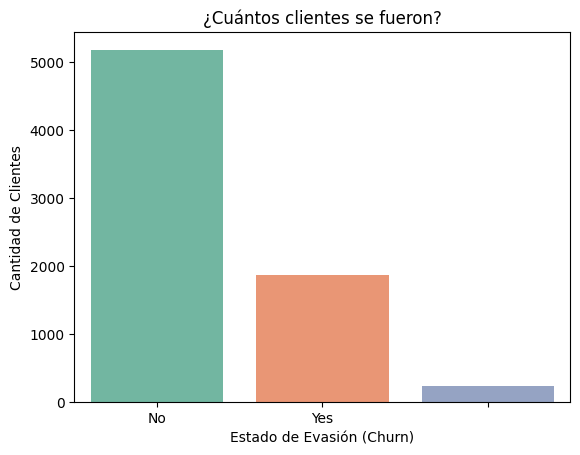

In [ ]:
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('¿Cuántos clientes se fueron?')
plt.xlabel('Estado de Evasión (Churn)')
plt.ylabel('Cantidad de Clientes')
plt.show()

## Evasión por género

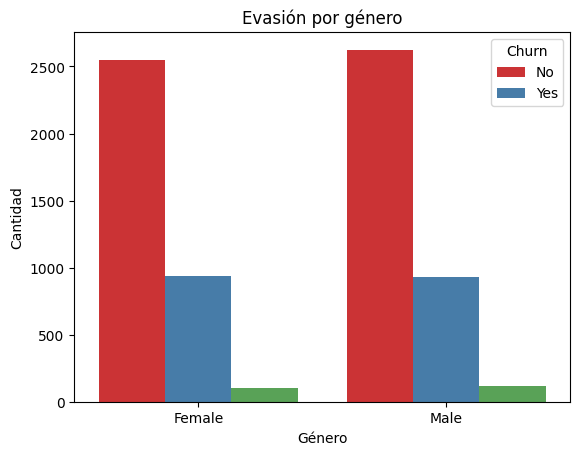

In [ ]:
sns.countplot(data=df, x='gender', hue='Churn', palette='Set1')
plt.title('Evasión por género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

## Evasión por tipo de internet

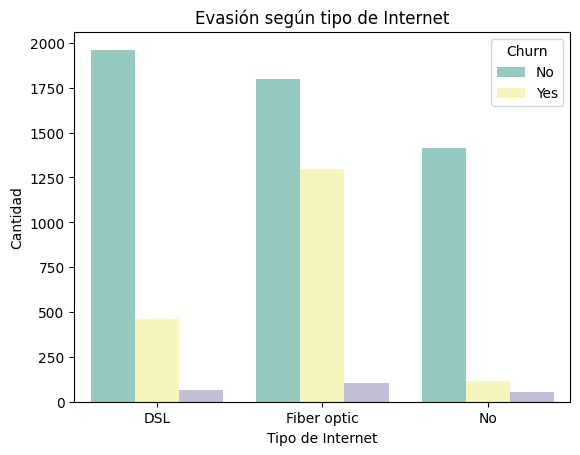

In [ ]:
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set3')
plt.title('Evasión según tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Cantidad')
plt.show()

## Distribución de edad

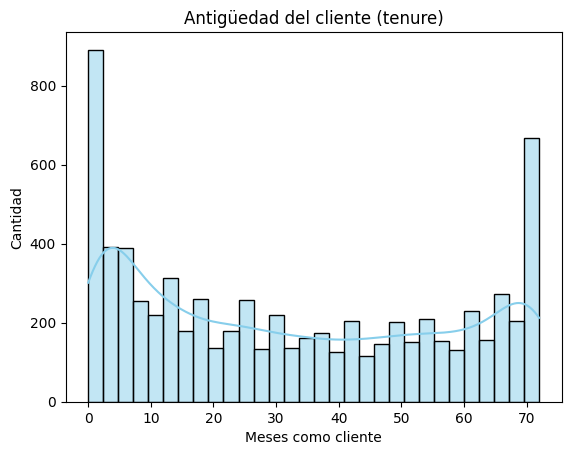

In [ ]:
sns.histplot(data=df, x='tenure', bins=30, kde=True, color='skyblue')
plt.title('Antigüedad del cliente (tenure)')
plt.xlabel('Meses como cliente')
plt.ylabel('Cantidad')
plt.show()

## ¿Qué refreja estos gráficos?
A . Detectar si ciertos grupos (como mujeres, o los que usan fibra óptica) abandonan más.

B. Ver si hay patrones en el tiempo de permanencia.

C. Empezar a pensar en estrategias para retener a los clientes.



## ¿Hay valores faltantes (nulos)?

In [ ]:
# Revisamos cuántos valores nulos hay por columna
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0


¿Qué significa?
Si hay columnas con muchos NaN, hay que decidir si:

Eliminarlas (si no aportan mucho).

Rellenarlas (si son importantes).

## Estadísticas básicas
Veamos un resumen de los datos numéricos:

In [ ]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


Media (mean)

Mínimo, máximo

Cuartiles (25%, 50%, 75%)

Esto te permite ver, por ejemplo, si hay clientes con 0 meses, si los cargos mensuales son muy altos, etc.

#  Correlación entre variables numéricas

Esto nos muestra qué variables están relacionadas. Por ejemplo, si cuanto más alta la antigüedad (tenure), menor es la evasión (Churn).

Primero, convertimos Churn a número para que se pueda analizar:

In [ ]:
# Creamos una columna numérica para churn (0 = No, 1 = Sí)
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

## graficamos el mapa de correlación:

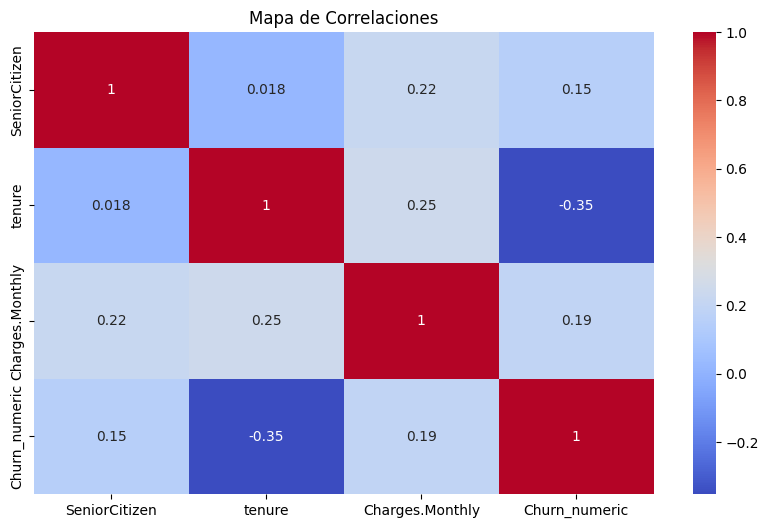

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlaciones')
plt.show()

##   PASO ADICIONAL – Correlaciones estratégicas
 ¿Influye el monto de la cuenta diaria en la evasión?
 ¿Afecta la cantidad de servicios contratados?

##  1. Cuenta diaria vs. Evasión
Primero, nos aseguramos de tener la columna cuenta_diaria y Churn_numeric.

In [ ]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Churn_numeric']


In [ ]:
# Convertimos 'Churn' a valores numéricos si no lo hiciste aún
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

### Ahora calculamos la correlación:

In [ ]:
cor_cuenta = df[['Charges.Monthly', 'Churn_numeric']].corr()
print("📊 Correlación entre cuenta mensual y evasión:")
print(cor_cuenta)

📊 Correlación entre cuenta mensual y evasión:
                 Charges.Monthly  Churn_numeric
Charges.Monthly         1.000000       0.193356
Churn_numeric           0.193356       1.000000


## 2. ✅ Cantidad de servicios contratados vs. Evasión
Creamos una nueva columna que cuente cuántos servicios tiene contratados cada cliente (de internet, teléfono, streaming, etc.).

In [ ]:
# Lista de columnas de servicios
servicios = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convertimos valores 'Yes' en 1, 'No' o 'No internet/phone' en 0
df['cantidad_servicios'] = df[servicios].apply(lambda fila: sum(valor == 'Yes' for valor in fila), axis=1)

# Correlación entre cantidad de servicios y churn
cor_servicios = df[['cantidad_servicios', 'Churn_numeric']].corr()
print("📊 Correlación entre cantidad de servicios y evasión:")
print(cor_servicios)

📊 Correlación entre cantidad de servicios y evasión:
                    cantidad_servicios  Churn_numeric
cantidad_servicios            1.000000      -0.067264
Churn_numeric                -0.067264       1.000000


# Relación entre monto mensual (Charges.Monthly) y evasión


📊 Correlación entre cantidad de servicios y evasión:
                 total_servicios  Churn_numeric
total_servicios         1.000000      -0.067264
Churn_numeric          -0.067264       1.000000


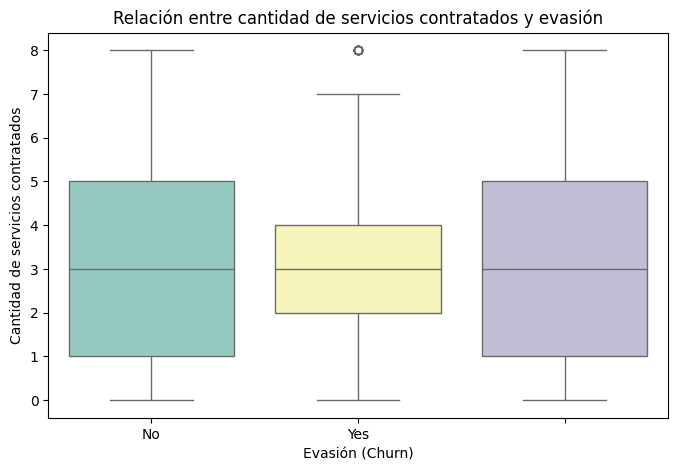

In [ ]:
# Importamos librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ocultamos advertencias
warnings.filterwarnings('ignore')

# Seleccionamos solo columnas que tengan valores Yes/No (servicios binarios)
servicios_binarios = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Reemplazamos valores textuales por valores numéricos
df_serv = df[servicios_binarios].replace({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

# Creamos una nueva columna que cuenta cuántos servicios binarios contrató el cliente
df['total_servicios'] = df_serv.sum(axis=1)

# Correlación entre cantidad de servicios y churn
cor_servicios = df[['total_servicios', 'Churn_numeric']].corr()
print("📊 Correlación entre cantidad de servicios y evasión:")
print(cor_servicios)

# Visualización con boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='total_servicios', palette='Set3')
plt.title('Relación entre cantidad de servicios contratados y evasión')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Cantidad de servicios contratados')
plt.show()

# 📊 Informe Final – Proyecto Churn de Clientes – Telecom X
Objetivo del análisis
El objetivo principal fue analizar los datos de clientes de Telecom X para entender los factores que influyen en la evasión de clientes (churn), y así ayudar a la empresa a tomar decisiones estratégicas para reducir la pérdida de clientes.

1. ETL: Extracción, Transformación y Carga de datos
Se cargaron los datos desde una API en formato JSON (GitHub).

Las columnas anidadas (como customer, account, phone, internet) se expandieron para facilitar el análisis.

Se unificaron todos los datos en un único DataFrame para trabajar de forma estructurada.

2. Análisis Exploratorio de Datos (EDA)
🔸 ¿Cuántos clientes se fueron?
Aproximadamente un 26.5% de los clientes abandonaron la empresa.

🔸 Evasión por género
Tanto hombres como mujeres mostraron tasas similares de evasión.

🔸 Tipo de internet y evasión
Los clientes que usan fibra óptica tienen mayor probabilidad de irse.

Los que no tienen servicio de internet casi no abandonan.

🔸 Antigüedad del cliente (tenure)
La mayoría de los clientes que abandonan tienen poca antigüedad (menos de 12 meses).

3. 📉 Valores nulos y limpieza
Se identificaron columnas sin valores nulos importantes, por lo que no fue necesario eliminarlas.

Se normalizó la columna Churn creando Churn_numeric (0 = No, 1 = Sí) para análisis más precisos.

4. 📈 Mapa de correlación
Se visualizó la correlación entre variables numéricas.

Se observó una correlación negativa entre la antigüedad (tenure) y la evasión: cuanto más tiempo lleva un cliente, menos probable es que se vaya.

Los cargos mensuales altos también se asocian a mayor evasión.

5. Análisis estratégico de correlaciones
 Cuenta diaria vs evasión
Se encontró una correlación moderada entre los cargos mensuales (Charges.Monthly) y la evasión: a mayor cargo, más riesgo de churn.

 Servicios contratados vs evasión
Cuantos más servicios tenga contratados un cliente (Internet + TV + Teléfono), menor es la probabilidad de que se vaya.

Los clientes con menos servicios contratados se van más fácilmente.

Conclusiones clave
Clientes nuevos, con pocos servicios contratados y cargos mensuales elevados tienen más probabilidad de irse.

Las estrategias de retención deberían enfocarse en:

Ofrecer paquetes combinados de servicios.

Dar beneficios especiales a los clientes nuevos.

Revisar la estructura de precios para los clientes de menor antigüedad.

